# TFM. Analisis Datos
## MVP

## Importacion de librerias 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_columns = None

### Analisis Datos

In [2]:
df_Envios = pd.read_pickle('./data/df_Envios')
df_Call = pd.read_pickle('./data/df_Call')

In [3]:
df_explore = pd.concat([df_Envios, df_Call], axis=1).reset_index()
df_explore.dropna(inplace=True)
df_explore.head()

,index,E-commerce,Económico,Marítimo baleares,Urgente 10,Urgente 12,Urgente 19,Urgente 19 expedición,Monday,Tuesday,Wednesday,Thursday,Friday,dateCreacion
43,2020-03-02,872.0,322.0,1263.0,147.0,247.0,89.0,50.0,3079.0,0.0,0.0,0.0,0.0,350.0
44,2020-03-03,550.0,359.0,834.0,103.0,191.0,113.0,46.0,0.0,2267.0,0.0,0.0,0.0,343.0
45,2020-03-04,378.0,115.0,675.0,29.0,72.0,65.0,28.0,0.0,0.0,1376.0,0.0,0.0,327.0
46,2020-03-05,375.0,0.0,871.0,37.0,1.0,0.0,0.0,0.0,0.0,0.0,1284.0,0.0,366.0
47,2020-03-06,2352.0,844.0,4367.0,329.0,506.0,213.0,166.0,0.0,0.0,0.0,0.0,8903.0,328.0


In [4]:
df_explore.iloc[:,1:-1] = np.log(df_explore.iloc[:,1:-1]).replace(-np.inf, 0)
df_explore.head()

,index,E-commerce,Económico,Marítimo baleares,Urgente 10,Urgente 12,Urgente 19,Urgente 19 expedición,Monday,Tuesday,Wednesday,Thursday,Friday,dateCreacion
43,2020-03-02,6.770789,5.774552,7.141245,4.990433,5.509388,4.488636,3.912023,8.03236,0.000000,0.000000,0.000000,0.000000,350.0
44,2020-03-03,6.309918,5.883322,6.726233,4.634729,5.252273,4.727388,3.828641,0.00000,7.726213,0.000000,0.000000,0.000000,343.0
45,2020-03-04,5.934894,4.744932,6.514713,3.367296,4.276666,4.174387,3.332205,0.00000,0.000000,7.226936,0.000000,0.000000,327.0
46,2020-03-05,5.926926,0.000000,6.769642,3.610918,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,7.157735,0.000000,366.0
47,2020-03-06,7.763021,6.738152,8.381832,5.796058,6.226537,5.361292,5.111988,0.00000,0.000000,0.000000,0.000000,9.094144,328.0


In [5]:
df_explore.sum()

index                    2020-03-022020-03-032020-03-042020-03-052020-0...
E-commerce                                                     1432.341266
Económico                                                      1204.906835
Marítimo baleares                                              1631.812252
Urgente 10                                                      1011.30876
Urgente 12                                                     1080.363808
Urgente 19                                                      907.345987
Urgente 19 expedición                                           815.627536
Monday                                                          363.865334
Tuesday                                                         351.479749
Wednesday                                                       357.220336
Thursday                                                        361.626912
Friday                                                          368.424736
dateCreacion             

In [6]:
df_explore.dateCreacion.describe()

count    234.000000
mean     447.111111
std      165.709958
min       29.000000
25%      356.000000
50%      402.500000
75%      499.500000
max      946.000000
Name: dateCreacion, dtype: float64

In [7]:
#df_subset = df_explore.iloc[:,[0,1]]
#df_subtotal = df_explore.iloc[:,-1]
#df_subtotal = pd.concat([df_subset, df_subtotal], axis=1)
#df_subtotal.head()

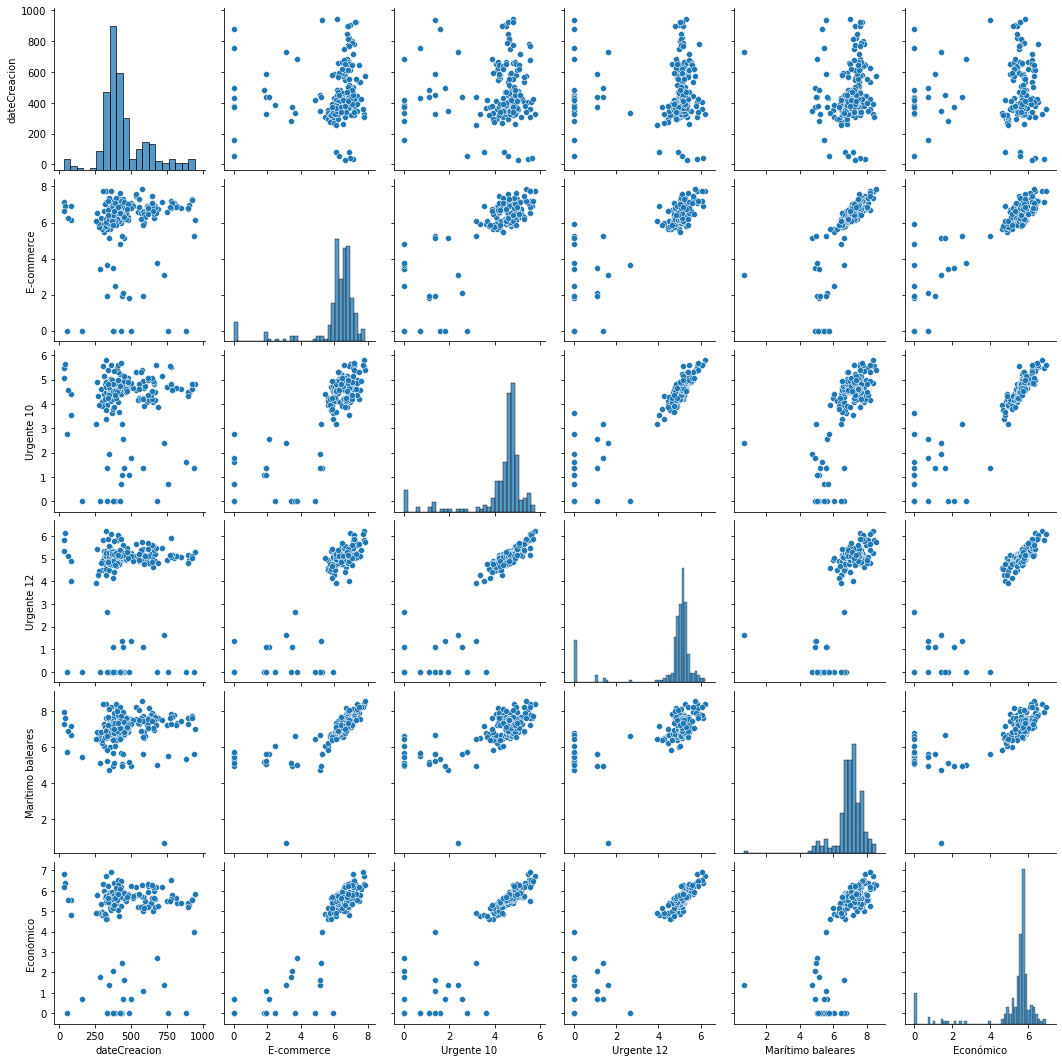

In [8]:
sns.pairplot(df_explore.loc[:,['dateCreacion','E-commerce', 'Urgente 10', 'Urgente 12', 'Marítimo baleares', 'Económico']]);

In [9]:
x = np.array(df_explore['index'])
#envios = np.array(df_explore['total'])
llamadas = np.array(df_explore['dateCreacion'])

'''
envio24h = np.array(df_explore['Urgente 8:30'] + df_explore['Urgente 10'] + df_explore['Urgente 12'] + \
    df_explore['Urgente 14'] + df_explore['Urgente 19'] + df_explore['Urgente 8:30 expedición'] + \
    df_explore['Urgente 10 expedición'] + df_explore['Urgente 12 expedición'] + \
    df_explore['Urgente 19 expedición'] + df_explore['Burofax'] + \
    df_explore['Mascotas'])
'''

envio24h = np.array(df_explore['Urgente 10'] + df_explore['Urgente 12'] + df_explore['Urgente 19'])


envio48h = np.array(df_explore['Económico'] + df_explore['E-commerce'])

'''
minoritarios =  np.array(df_explore['Bag 14'] + df_explore['Bag 19'] + df_explore['Express documentos'] + \
    df_explore['Documentos 14'] + df_explore['Urgente hoy'] +  df_explore['Urgente 14 expedición'] + \
    df_explore['Retorno canje'] + df_explore['Mrw economy (ecopaq)'])

minoritarios =  np.array(df_explore['Bag 19'] + df_explore['Express documentos'] + \
    df_explore['Mrw economy (ecopaq)'])

'''


maritimo = np.array(df_explore['Marítimo baleares'])

In [10]:
def normalizar2(Xs, datos, llamadas):
    mask = datos == 0
    x = np.delete(Xs, mask)
    d1 = np.delete(datos, mask)
    d2 = np.delete(llamadas, mask)
    d1 = np.log(d1)
    d2 = np.log(d2)
    
    return x, d1, d2

def normalizar(Xs, datos, llamadas):
    mask = datos == 0
    x = np.delete(Xs, mask)
    d1 = np.delete(datos, mask)
    d2 = np.delete(llamadas, mask)
    
    return x, d1, d2

In [11]:
'''
Xs, ys1, ys2 = normalizar(x, envios, llamadas)
plt.scatter(Xs, ys1, c='black')
plt.scatter(Xs, ys2, c='blue', alpha=.5);
'''

"\nXs, ys1, ys2 = normalizar(x, envios, llamadas)\nplt.scatter(Xs, ys1, c='black')\nplt.scatter(Xs, ys2, c='blue', alpha=.5);\n"

In [12]:
'''
Xs, ys1, ys2 = normalizar(x, envio24h, llamadas)
plt.scatter(Xs, ys1, c='green')
plt.scatter(Xs, ys2, c='blue', alpha=.5);
'''

"\nXs, ys1, ys2 = normalizar(x, envio24h, llamadas)\nplt.scatter(Xs, ys1, c='green')\nplt.scatter(Xs, ys2, c='blue', alpha=.5);\n"

In [13]:
'''
Xs, ys1, ys2 = normalizar(x, envio48h, llamadas)
plt.scatter(Xs, ys1, c='red')
plt.scatter(Xs, ys2, c='blue', alpha=.5);
'''

"\nXs, ys1, ys2 = normalizar(x, envio48h, llamadas)\nplt.scatter(Xs, ys1, c='red')\nplt.scatter(Xs, ys2, c='blue', alpha=.5);\n"

In [14]:
'''
Xs, ys1, ys2 = normalizar(x, maritimo, llamadas)
plt.scatter(Xs, ys1, c='orange')
plt.scatter(Xs, ys2, c='blue', alpha=.5);
'''

"\nXs, ys1, ys2 = normalizar(x, maritimo, llamadas)\nplt.scatter(Xs, ys1, c='orange')\nplt.scatter(Xs, ys2, c='blue', alpha=.5);\n"

In [15]:
'''
Xs, ys1, ys2 = normalizar(x, minoritarios, llamadas)
plt.scatter(Xs, ys1, c='pink')
plt.scatter(Xs, ys2, c='blue', alpha=.5);
'''

"\nXs, ys1, ys2 = normalizar(x, minoritarios, llamadas)\nplt.scatter(Xs, ys1, c='pink')\nplt.scatter(Xs, ys2, c='blue', alpha=.5);\n"

In [16]:
df_explore.to_pickle('./data/df_data')